In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('heartdataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Standardized the Variables

In [2]:
from sklearn.preprocessing import StandardScaler


In [3]:
scaler=StandardScaler()


In [4]:
scaler.fit(df.drop('DEATH_EVENT',axis=1))


StandardScaler()

In [5]:
scaled_features=scaler.transform(df.drop('DEATH_EVENT',axis=1))

In [6]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


# Split the train and test data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(scaled_features,df['DEATH_EVENT'],test_size=0.30)

# Using KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
knn=KNeighborsClassifier(n_neighbors=1)

In [11]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred=knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix


In [14]:
print(confusion_matrix(Y_test,pred))

[[47 15]
 [14 14]]


In [15]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        62
           1       0.48      0.50      0.49        28

    accuracy                           0.68        90
   macro avg       0.63      0.63      0.63        90
weighted avg       0.68      0.68      0.68        90



# Choosing a K value

In [16]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=Y_test))
    

Text(0, 0.5, 'Error Rate')

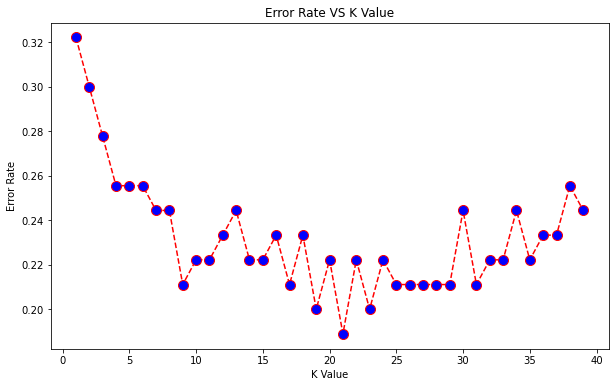

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate VS K Value")
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Here we can see that after arounds k>15 the error rate just trends to hover around 0.26-0.28.Lets retrain the model with that and check the classification report.

In [36]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print("K value is equal to 15")
print("\n")
print(confusion_matrix(Y_test,pred))
print("\n")
print(classification_report(Y_test,pred))


K value is equal to 15


[[58  1]
 [23  8]]


              precision    recall  f1-score   support

           0       0.72      0.98      0.83        59
           1       0.89      0.26      0.40        31

    accuracy                           0.73        90
   macro avg       0.80      0.62      0.61        90
weighted avg       0.78      0.73      0.68        90

